<a href="https://colab.research.google.com/github/AmiraliEsi83/The-CIFAR-10-dataset/blob/main/vgg16OnCfar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
(x_train, y_train), (x_test, y_test) = tk.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train.shape

(50000, 1)

In [7]:
classes = np.unique(y_train)

In [8]:
len(classes)

10

In [9]:
x_train[22].shape

(32, 32, 3)

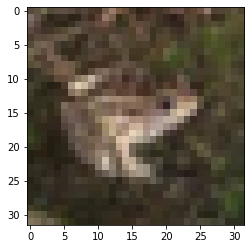

In [10]:
plt.imshow(x_train[22]);

Normalization

In [11]:
x_train = x_train/255

In [12]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
y_train[0].shape

(1,)

In [14]:
x_test = x_test/255

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


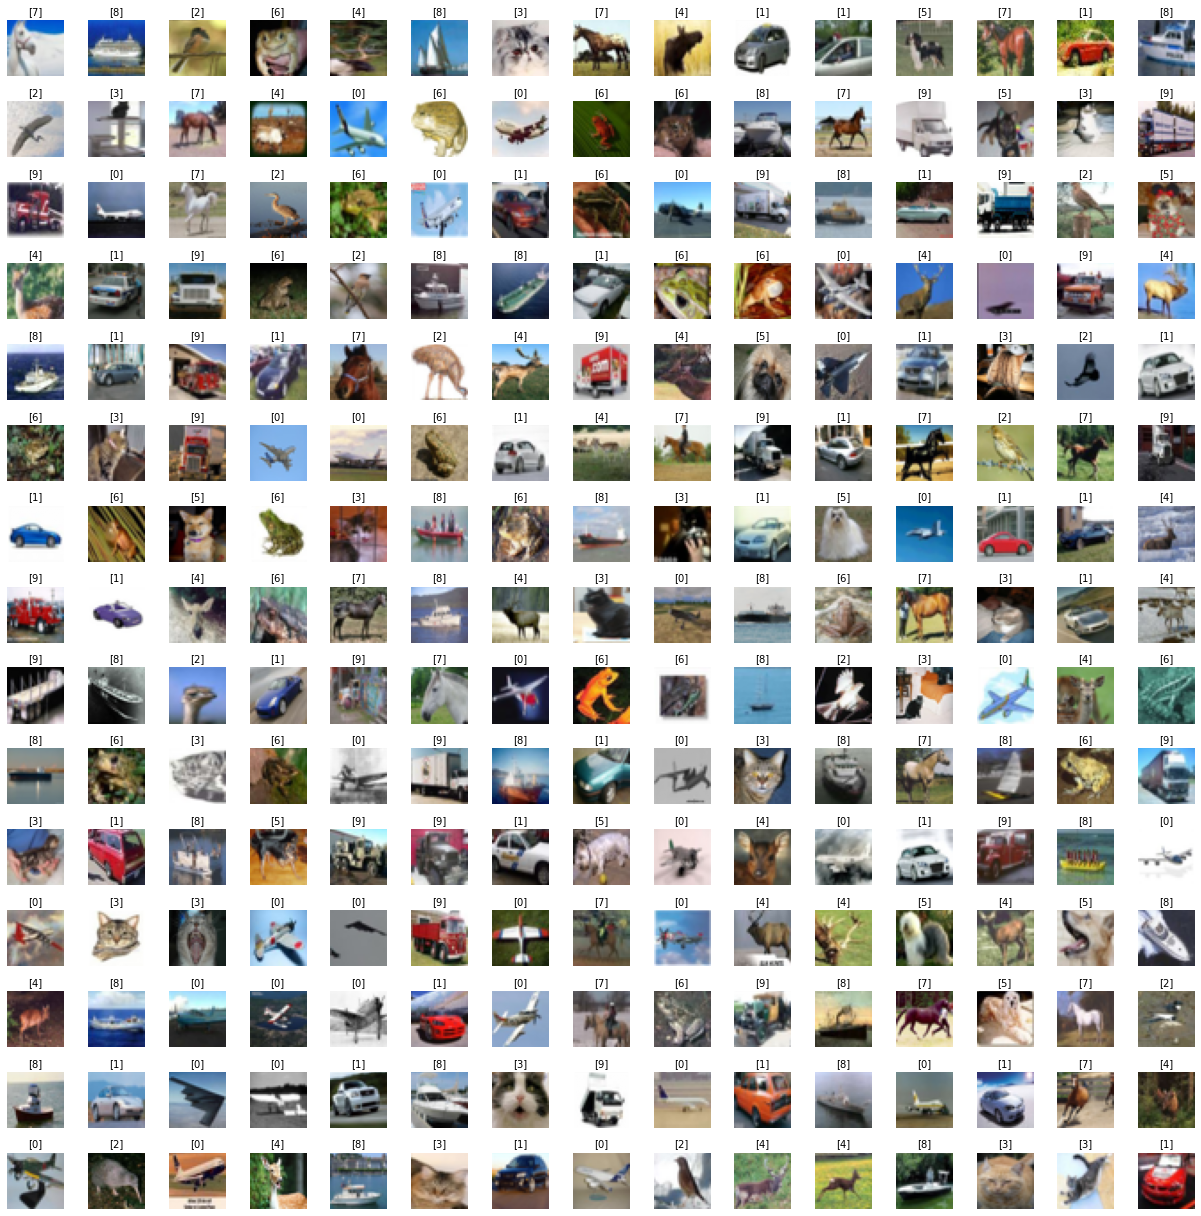

In [15]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [16]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

58889256/58889256 [==============================] - 3s 0us/step


In [17]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [18]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_validate, y_validate))

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 57s 31ms/step - loss: 1.9120 - accuracy: 0.2227 - val_loss: 1.6600 - val_accuracy: 0.3280
Epoch 2/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.5499 - accuracy: 0.3779 - val_loss: 1.4651 - val_accuracy: 0.4212
Epoch 3/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3390 - accuracy: 0.4916 - val_loss: 1.1993 - val_accuracy: 0.5610
Epoch 4/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1354 - accuracy: 0.5978 - val_loss: 1.0649 - val_accuracy: 0.6296
Epoch 5/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9964 - accuracy: 0.6581 - val_loss: 0.9817 - val_accuracy: 0.6563
Epoch 6/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9010 - accuracy: 0.6962 - val_loss: 0.9686 - val_accuracy: 0.6734
Epoch 7/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.8236 - accuracy: 0.7220 - val_loss: 0.8374 - val_

In [22]:
evaluation = model.evaluate(x_test,y_test)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Test accuracy: 10.00%


In [23]:
predicted_classes = model.predict(x_test)
len(predicted_classes)

313/313 [==============================] - 2s 7ms/step


10000

In [24]:
print(predicted_classes[0])
y_test[0]

[0.10045994 0.09895016 0.09972434 0.09811768 0.1007332  0.10035791
 0.09951595 0.10219079 0.10094673 0.0990033 ]


array([3], dtype=uint8)

In [25]:
np.argmax(predicted_classes[0])

7

In [26]:
y_test[0]

array([3], dtype=uint8)